In [3]:
#import module folder containing general functions used frequently
modulepath = '/Users/mo2016/Documents/modelling/6eq/modules'
import sys
sys.path.append(modulepath)

#importing functions from that module folder
from parametercombination_analysis import *
from randomfunctions import wavelenght_from_dispersion, plot_highest_dispersion
from lhs import *
from findsteadystates_functions import *
from dispersionrelation_functions import *
# from lsafunctions import jacobianlsa


import os

#other imports
import time
import datetime
import scipy.io
import numpy as np
from numpy import linalg as LA
import pickle
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import re
import seaborn as sns
#path of folder containing code, results, parameter files
path = '/Users/mo2016/Documents/modelling/6eq/parameter_space_search'
PCApath = '/Users/mo2016/Documents/modelling/6eq/PCA'


from datetime import date, timedelta

# date_yesterday = (date.today() - timedelta(2)).isoformat()
# date_yesterday = str(date.today())

In [12]:
def open_dfs(filename):
    turing_df= pickle.load( open(path +  '/results/turing_dataframes/%s.pkl'%filename, "rb" ) )
    turing_df = turing_df.drop(columns = ['n', 'd_A'])
    loguniform_df= pickle.load( open(path +  '/results/turing_dataframes/loguniform_dataframes/df_loguniform_%r.pkl'%len(turing_df), "rb" ) )
#     loguniform_df = loguniform_df.drop(columns = ['n', 'd_A' ,'d_B'])
    loguniform_df = loguniform_df.drop(columns = ['n', 'd_A' ])

    joint_df = pd.concat([turing_df,loguniform_df], ignore_index=True, sort=True)
    return turing_df, loguniform_df, joint_df


# Distribution HSL diffusion and ATC

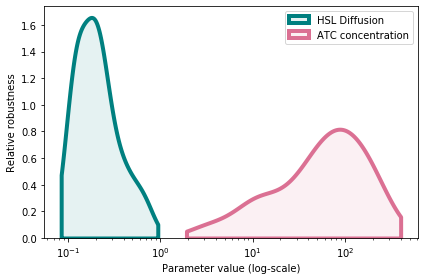

In [13]:
df_concat = turing_monostable_df

parameter1 = 'd_B'
parameter2 = 'kce'

sns.kdeplot(df_concat.loc[:,parameter1].values, fill=True,log_scale=True,cut=1,color='teal', linewidth = 4, alpha = 0.1,label = 'HSL Diffusion')
sns.kdeplot(df_concat.loc[:,parameter2].values, fill=True,log_scale=True,cut=1,color='palevioletred', linewidth = 4, alpha = 0.1, label = 'ATC concentration')
plt.ylabel('Relative robustness')
plt.xlabel('Parameter value (log-scale)')
plt.xscale('log')
plt.legend()
plt.tight_layout()
plt.savefig(path+'/results/figures/parameter_distribution/kde_d_B.png')



# Overall parameter distribution

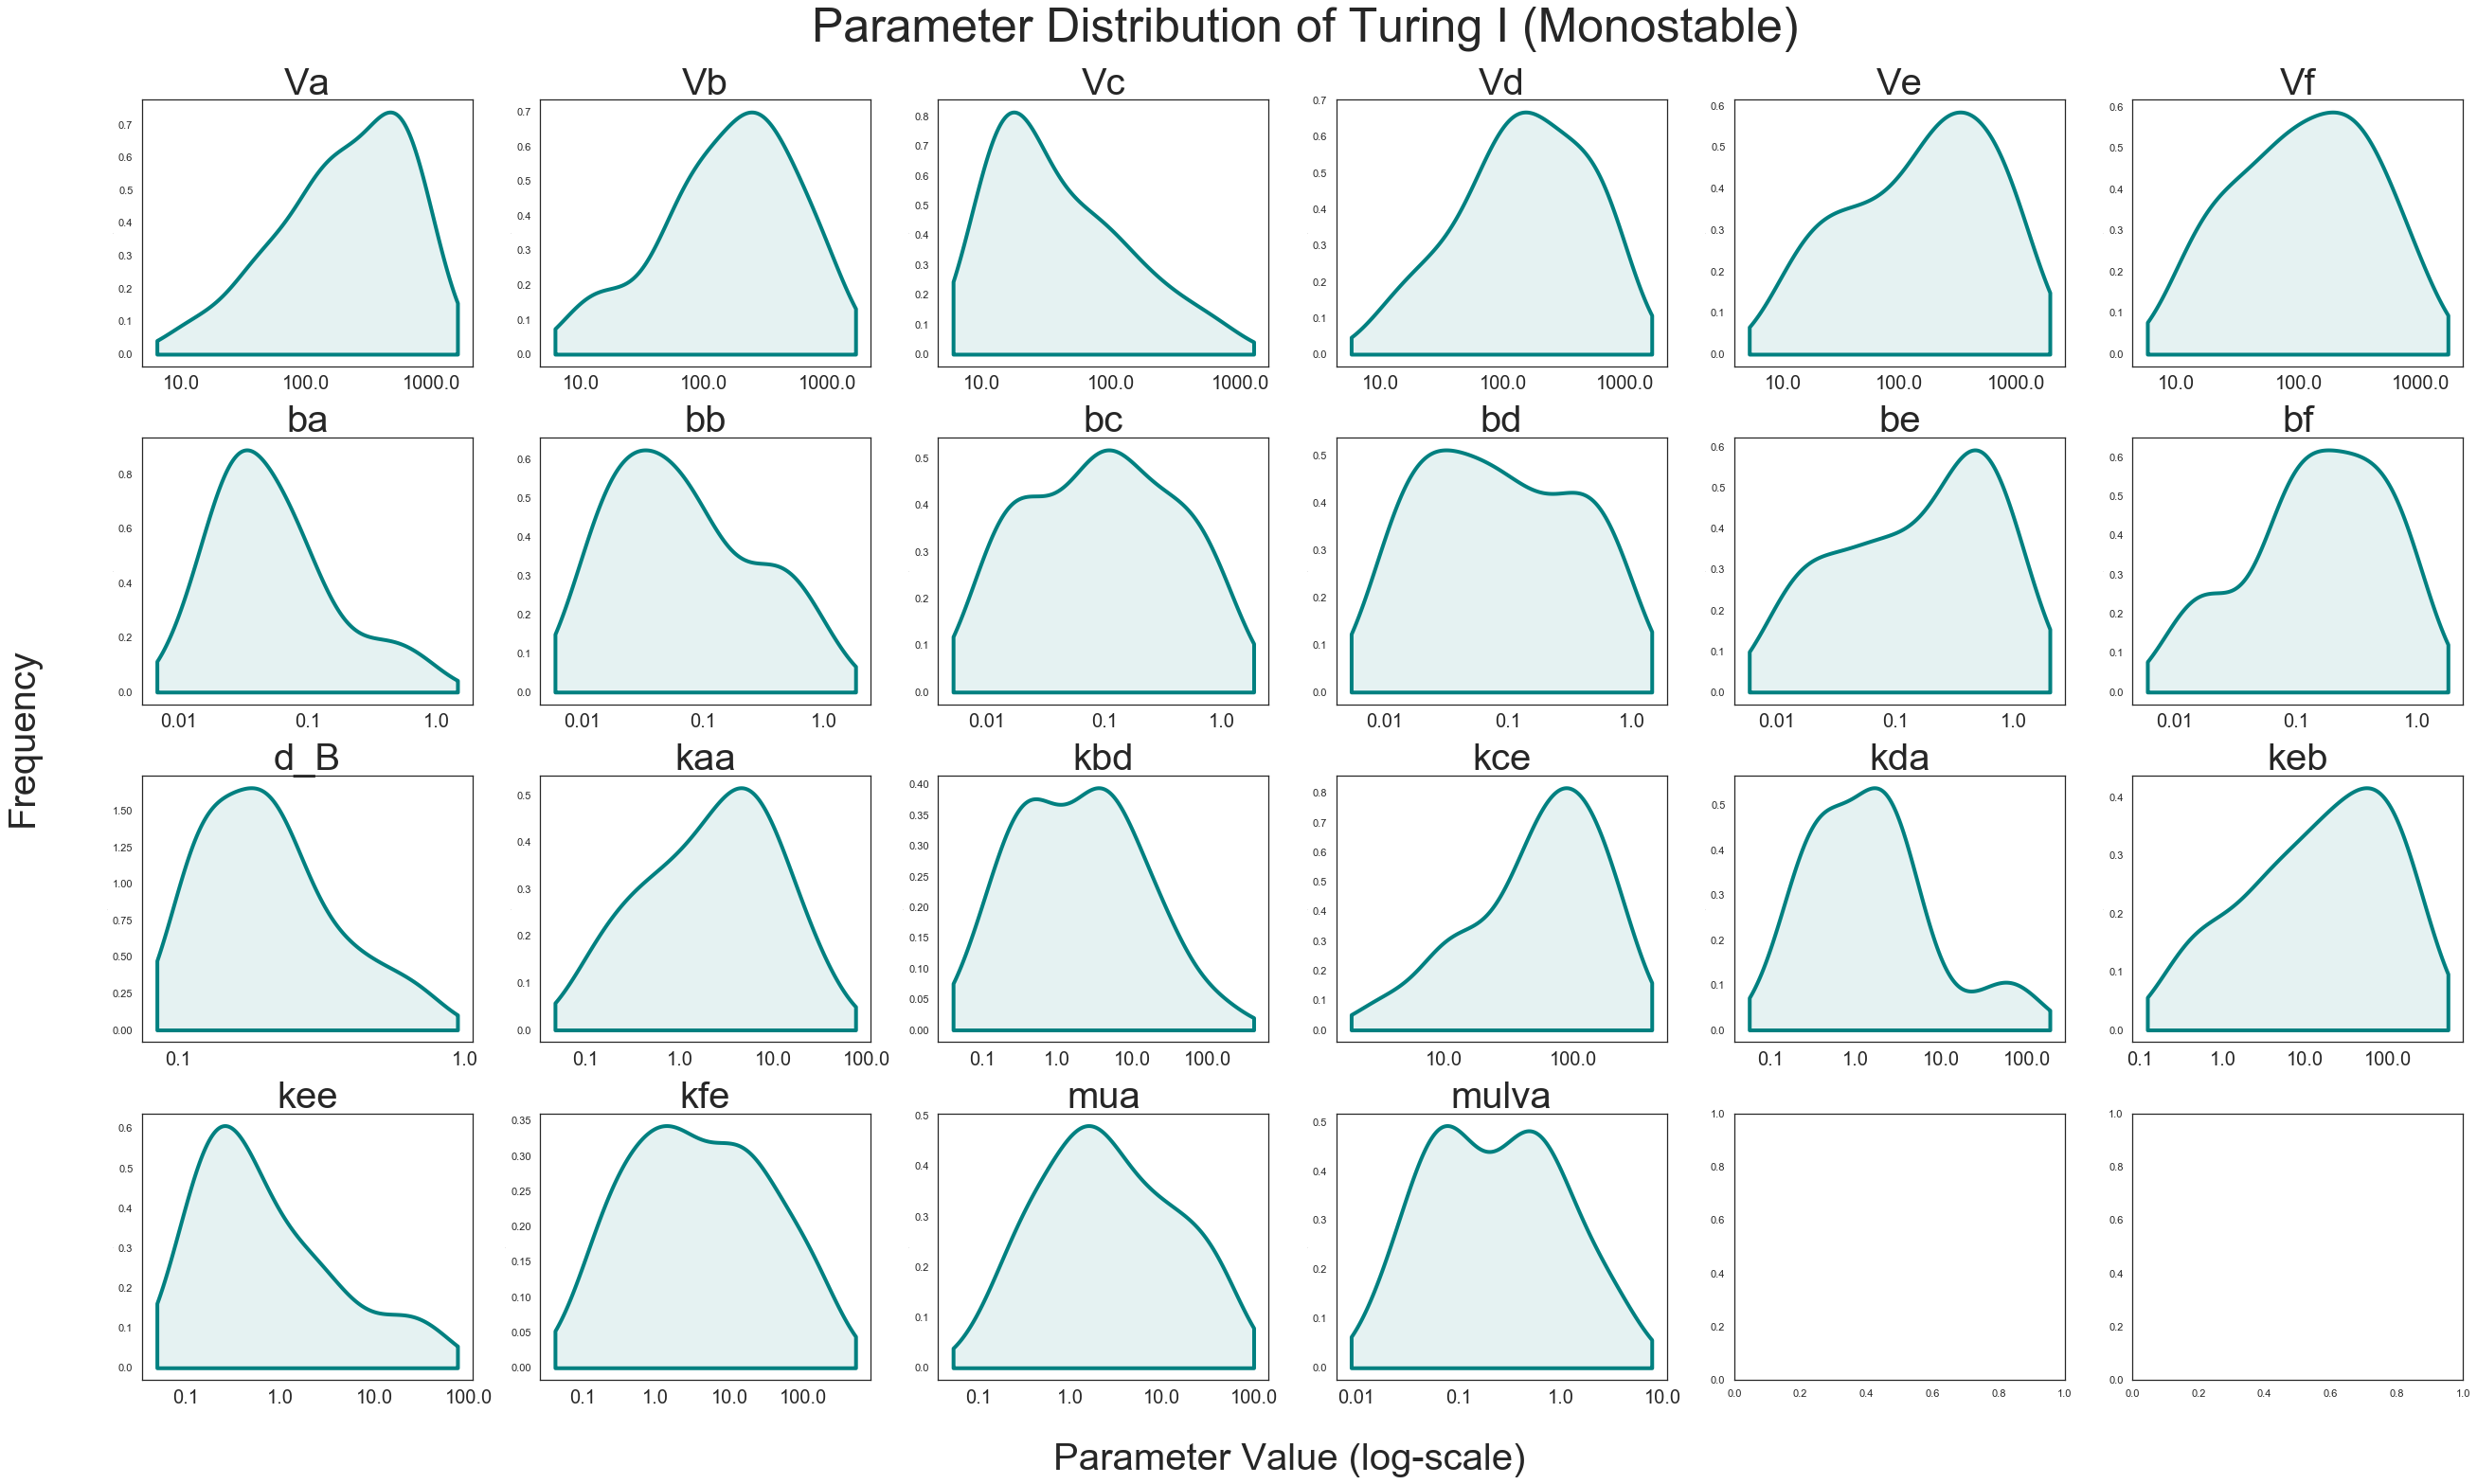

In [16]:
#Distribution of Turing I Monostable kinetic parameters
# turing_monostable_df, loguniform_turing_monostable_df, joint_turing_monostable_df = open_dfs('circuit2_turingI_monostable_df')
# lenght_turing = len(turing_monostable_df)
df_concat = turing_monostable_df


par_dict = df_concat.iloc[0].to_dict()
parameter_list = [key for key, value in par_dict.items()]    
sns.set(style="white", palette="muted", color_codes=False)

fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(35,20))
axs = axs.flatten()

palette = sns.diverging_palette(10, 220, n=2)
for count, parameter in enumerate(parameter_list):
    LogMin, LogMax = np.log10(df_concat.iloc[:,count].min()),np.log10(df_concat.iloc[:,count].max())
    newBins = np.logspace(LogMin, LogMax,100)
#     sns.histplot(df_concat.iloc[lenght_turing:,count].values, bins=newBins, kde=False, color = 'grey',alpha=0.001, ax = axs[count])
#     sns.histplot(df_concat.iloc[:lenght_turing,count].values, bins=newBins, kde=False, color = 'mediumseagreen', alpha=0.001, ax = axs[count])
#     lower_limit_distribution = np.amin(big_loguniform.iloc[:,count])
#     upper_limit_distribution = np.amax(big_loguniform.iloc[:,count])
    sns.kdeplot(df_concat.iloc[:,count].values, fill=True,log_scale=True,cut=1,color='teal', linewidth = 4, alpha = 0.1, ax = axs[count])

    axs[count].set_xscale('log')
#     axs[count].set_yticklabels(axs[count].get_yticks(), size = 20)
    axs[count].set_ylabel('f', size = 0.001)
    axs[count].set_xticklabels(axs[count].get_xticks(), size = 20)
    axs[count].set_title(str(parameter),fontsize=40)
#     axs[count].set(ylim=(0,1))    




fig.tight_layout()
fig.text(0.3,1.01,'Parameter Distribution of Turing I (Monostable)', size=50)
fig.text(0.5,-0.03, "Parameter Value (log-scale)", ha="center", va="center",  fontsize=40)
fig.text(-0.03,0.5, "Relative robustness", ha="center", va="center", rotation=90 ,fontsize=40)
fig.savefig(path + '/results/figures/parameter_distribution/distribution_turingI_monostable.png', bbox_inches="tight")
plt.show()

# Conclusion

Monostable and multistable seem to have the same distribution of kinetic parameters. Therefore, when carrying large analysis and understanding parameters we could use multistable systems as well. 

Some parameters seem to have a very clear distribution for Turing I pattern formation:
- V tuning:
    - Va high
    - Vb high
    - Vc low
- km tuning:
    - kce high
- mu tuning:
    - mua high but not too high
    - mub high
    - mulva high but not too high (but lower than mub). mulva must be the lowest degradation rate